# Star Wars Survey

This is a guided project aiming to practice data cleaning. This project is to analyze the preference of viewers for Star Wars movies. The data is based on the FiveThirtyEight's survey available at <a href="https://github.com/fivethirtyeight/data/tree/master/star-wars-survey">their GitHub repository</a>.

## Read in data

In [1]:
import pandas as pd
import numpy as np
star_wars = pd.read_csv("StarWars.csv", encoding="ISO-8859-1")

star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episo

In [2]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [3]:
print(star_wars.iloc[0])

RespondentID                                                                                                                                                                              NaN
Have you seen any of the 6 films in the Star Wars franchise?                                                                                                                         Response
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                                                                Response
Which of the following Star Wars films have you seen? Please select all that apply.                                                                  Star Wars: Episode I  The Phantom Menace
Unnamed: 4                                                                                                                                        Star Wars: Episode II  Attack of the Clones
Unnamed: 5                                        

In [4]:
# Index 0 contains the preset answers for each question. Hence, this will be removed.

star_wars = star_wars[1:]

## Cleaning and Mapping Yes/No columns

In [5]:
# Mapping Yes/No to True/False

yes_no = {"Yes": True, "No": False}

columns = ["Have you seen any of the 6 films in the Star Wars franchise?", "Do you consider yourself to be a fan of the Star Wars film franchise?"]

for c in columns:
    star_wars[c] = star_wars[c].map(yes_no)
    print(star_wars[c].value_counts(dropna=False))
    print()

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64



In [6]:
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Cleaning and Mapping Checkbox columns

In [7]:
# Mapping checkbox to True/False

movies_map = {
"Star Wars: Episode I  The Phantom Menace": True,
"Star Wars: Episode II  Attack of the Clones": True,
"Star Wars: Episode III  Revenge of the Sith": True,
"Star Wars: Episode IV  A New Hope": True,
"Star Wars: Episode V The Empire Strikes Back": True,
"Star Wars: Episode VI Return of the Jedi": True,
np.NaN: False
}

for c in star_wars.columns[3:9]:
    star_wars[c] = star_wars[c].map(movies_map)
    print(star_wars[c].value_counts(dropna=False))
    print()

True     673
False    513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64

False    615
True     571
Name: Unnamed: 4, dtype: int64

False    636
True     550
Name: Unnamed: 5, dtype: int64

True     607
False    579
Name: Unnamed: 6, dtype: int64

True     758
False    428
Name: Unnamed: 7, dtype: int64

True     738
False    448
Name: Unnamed: 8, dtype: int64



In [8]:
# Rename columns

columns_map = {
"Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
"Unnamed: 4": "seen_2",
"Unnamed: 5": "seen_3",
"Unnamed: 6": "seen_4",
"Unnamed: 7": "seen_5",
"Unnamed: 8": "seen_6"
}

star_wars = star_wars.rename(columns=columns_map)

print(star_wars.columns[3:9])

Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')


## Cleaning the Ranking columns

In [9]:
# Convert each columns to float type

star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [10]:
# Rename columns

ranking_map = {
"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
"Unnamed: 10": "ranking_2",
"Unnamed: 11": "ranking_3",
"Unnamed: 12": "ranking_4",
"Unnamed: 13": "ranking_5",
"Unnamed: 14": "ranking_6"
}

star_wars = star_wars.rename(columns=ranking_map)

for c in star_wars.columns[9:15]:
    print(star_wars[c].value_counts(dropna=False))
    print()

NaN    351
4.0    237
6.0    168
3.0    130
1.0    129
5.0    100
2.0     71
Name: ranking_1, dtype: int64

NaN    350
5.0    300
4.0    183
2.0    116
3.0    103
6.0    102
1.0     32
Name: ranking_2, dtype: int64

NaN    351
6.0    217
5.0    203
4.0    182
3.0    150
2.0     47
1.0     36
Name: ranking_3, dtype: int64

NaN    350
1.0    204
6.0    161
2.0    135
4.0    130
3.0    127
5.0     79
Name: ranking_4, dtype: int64

NaN    350
1.0    289
2.0    235
5.0    118
3.0    106
4.0     47
6.0     41
Name: ranking_5, dtype: int64

NaN    350
2.0    232
3.0    220
1.0    146
6.0    145
4.0     57
5.0     36
Name: ranking_6, dtype: int64



## Finding the Highest-ranked Movie

In [11]:
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

In [12]:
ranking = star_wars[star_wars.columns[9:15]].mean()
print(ranking)

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


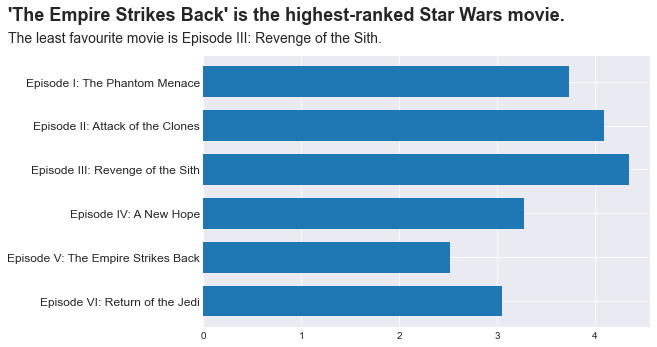

In [13]:
style.use("seaborn-darkgrid")

fig, ax = plt.subplots(figsize=(8, 5))
ranking.plot.barh(width=0.7)

ax.text(-2, -1.4, "'The Empire Strikes Back' is the highest-ranked Star Wars movie.", weight="bold", size=18)
ax.text(-2, -0.9, "The least favourite movie is Episode III: Revenge of the Sith.", size=14)

ax.invert_yaxis()
ax.set_yticklabels(["Episode I: The Phantom Menace", "Episode II: Attack of the Clones", "Episode III: Revenge of the Sith", "Episode IV: A New Hope", "Episode V: The Empire Strikes Back", "Episode VI: Return of the Jedi"], size=12)

plt.show()

The highest-ranked movie is "Star Wars: Episode V The Empire Strikes Back", followed by "Star Wars: Episode VI Return of the Jedi" and "Star Wars: Episode IV  A New Hope". All of them are the original Star Wars trilogy.

## Finding the Most-viewed Movie

In [14]:
seen = star_wars[star_wars.columns[3:9]].sum()
print(seen)

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64


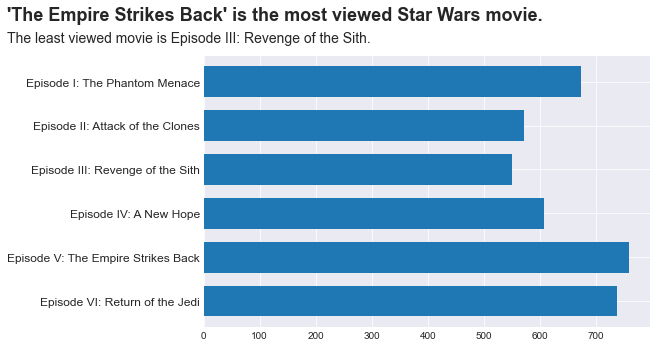

In [15]:
fig, ax = plt.subplots(figsize=(8, 5))
seen.plot.barh(width=0.7)

ax.text(-350, -1.4, "'The Empire Strikes Back' is the most viewed Star Wars movie.", weight="bold", size=18)
ax.text(-350, -0.9, "The least viewed movie is Episode III: Revenge of the Sith.", size=14)

ax.invert_yaxis()
ax.set_yticklabels(["Episode I: The Phantom Menace", "Episode II: Attack of the Clones", "Episode III: Revenge of the Sith", "Episode IV: A New Hope", "Episode V: The Empire Strikes Back", "Episode VI: Return of the Jedi"], size=12)

plt.show()

The number of people seeing each Star Wars seems to align with the ranking earlier. Episode 5 is the highest-ranked movie and is seen by most number of people.

## Exploring data by gender

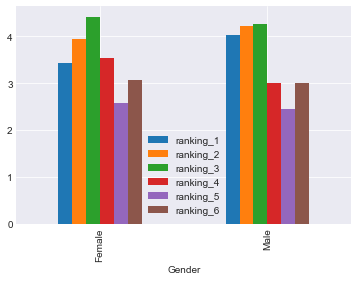

In [16]:
# Highest-rated movie

star_wars[star_wars.columns[9:15]].groupby(star_wars["Gender"]).mean().plot.bar()
plt.legend()
plt.show()

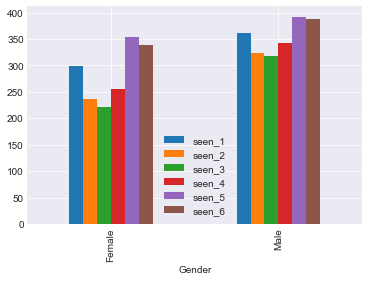

In [17]:
# Most-viewed movie

star_wars[star_wars.columns[3:9]].groupby(star_wars["Gender"]).sum().plot.bar()
plt.legend()
plt.show()

Both males and females viewers rated the first 3 movies higher than than the second trilogy of the Star Wars movies.

## Fan/non-fan differences in highest-rated and most seen Star Wars movies

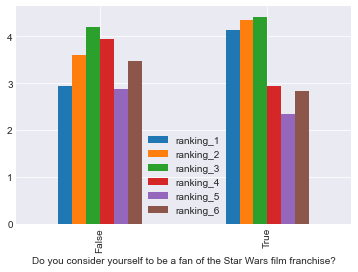

In [18]:
# Highest-rated movie

star_wars[star_wars.columns[9:15]].groupby(star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"]).mean().plot.bar()
plt.legend()
plt.show()

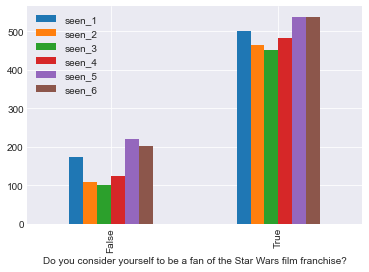

In [19]:
# Most-viewed movie

star_wars[star_wars.columns[3:9]].groupby(star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"]).sum().plot.bar()
plt.legend()
plt.show()

The Star War fans seem to prefer episode 4-6 (the first 3 movies) to episode 1-3. Surprisingly, non-fans seem to like episode 1 as much as they like episode 5, while episode 4 (which is much love by the fans) is ranked the 5th.

## Conclusion

- The original trilogy are rated higher than the second trilogy. 
- The original trilogy have higher views than the second trilogy.
- Star Wars Episode V: the Empire Strikes back is the highest-rated among male and female viewers.
- Star Wars fans prefer the original trilogy to the second trilogy.